# Make sure your Config File is set!!

In [1]:
!pip install requests

In [2]:
import requests 
import datetime
import base64
import pandas as pd
from urllib.parse import urlencode
import matplotlib.pyplot as plt
import numpy as np

# from config import client_id
# from config import client_secret

client_id = "61571ab2d97c41c79ef2c934842244f6"
client_secret = "13573e14e35c4a3ea20a280c0e9f49ae"

In [3]:
countries_df = pd.read_csv("../Resources/ISO_Country_Codes.csv")
countries_df = countries_df.drop(columns=["GEC","Alpha 2","Numeric","STANAG","INTERNET","COMMENT"])
countries_df = countries_df.dropna()
countries_df = countries_df.loc[countries_df["Alpha 1"] != '-']
iso_code = countries_df["Alpha 1"]

iso_code_head = iso_code.head()
iso_code_head
iso_code.to_csv("iso_code.csv")

In [14]:
class SpotifyAPI(object):
    access_token = None 
    access_token_expires = datetime.datetime.now()
    access_token_did_expire = True
    client_id = None 
    client_secret = None 
    token_url = "https://accounts.spotify.com/api/token"
    
    def __init__(self, client_id, client_secret, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.client_id = client_id
        self.client_secret = client_secret
    
    def get_client_credentials(self):
        """
        Returns a base 64 encoded string
        """
        client_id = self.client_id
        client_secret = self.client_secret
        
        if client_secret == None or client_id == None:
            raise Exception("You must set client_id and client_secret")
        
        client_creds = f"{client_id}:{client_secret}"
        client_creds_b64 = base64.b64encode(client_creds.encode())
        return client_creds_b64.decode()
        
    def get_token_headers(self):
        client_creds_b64 = self.get_client_credentials()
        return {
            "Authorization" : f"Basic {client_creds_b64}"
        }
    
    def get_token_data(self):
        return {
            "grant_type" : "client_credentials"
        }
    
    def perform_auth(self):
        token_url = self.token_url
        token_data = self.get_token_data()
        token_headers = self.get_token_headers()
        r = requests.post(token_url, data = token_data, headers = token_headers)
        if r.status_code not in range(200, 299): 
            return False
        data = r.json()
        now = datetime.datetime.now()
        access_token = data['access_token']
        expires_in = data['expires_in'] # seconds 
        expires = now + datetime.timedelta(seconds = expires_in)
        self.access_token = access_token
        self.access_token_expires = expires
        self.access_token_did_expire = expires < now
        return True

In [15]:
spotify = SpotifyAPI(client_id, client_secret)

In [16]:
spotify.perform_auth()

True

In [17]:
access_token = spotify.access_token
access_token

'BQCjQxWBGbwnIUyXQ-mAhYwDGufTsn-Gye24LNYa2ba8wcuArbchf292MhWYAfShDORDinNZeVKdF4I2TZg'

In [32]:
### BROWSE API - NEW RELEASES

headers = {
    "Authorization" : f"Bearer {access_token}"
}

endpoint = "https://api.spotify.com/v1/browse/new-releases?"

data = urlencode({"limit":50})

lookup_url = f"{endpoint}{data}"

response = requests.get(lookup_url, headers=headers).json()
# print(json.dumps(response, indent=4, sort_keys=True))

In [33]:
albums = response['albums']['items']

album_ids_50list = []
artist_ids_50list = []

for album in albums:
    album_ids_50list.append(album['id'])
    
    artists = album['artists']
    
    for artist in artists:
        artist_ids_50list.append(artist['id'])
    
print('*' *50, 'ALBUM IDs are: ', album_ids_50list)
#print('*' *50, 'ARTIST IDs are: ', artist_ids)

************************************************** ALBUM IDs are:  ['3P5WIUJO0Ots1lQx09TOxk', '6pbBHbkfs6i0JzhWjDmvb1', '1CQFYWHVdRypCsU2IU80t1', '3SGFxGF2loXeOFZtKvdmxo', '5vqILcEeCT0N1DeJBsLrGE', '76ME7LgGQq5fuTy9wWBHpq', '1wo8JeDRslm23n6rqpb3jk', '2s7jw1QyMFXe1fsSzla8cv', '7v0KN0VlHJZrhAbSbxEZvZ', '7HlxxaJOHK0ArY4Ae4Qfc7', '6yEZH1HexM9sqOX34qUE4u', '36Lr1Ipl7w3gn0NdZbRcge', '6wxPYC9LuoJCtKtFw4UDgf', '5tF7JnL3vVYaKap77UUz6p', '2TUgzZ8XOE8jm7tDpU4iME', '2LEEg9PQsJqQuhBU0poSrd', '7e9inFYUpFSKmTFbj2xrCS', '7Myw8J0byMIDilWT9vmZj5', '5EqnUTFVewiWTuN11K4G8E', '6xVP3wpk1yUu8X7zN9gzDW', '4ji352J0NHJfD5gHoJa7Oj', '6OxeYR6XlbyBvYMrUzAfe3', '0rWT19dCpPwXJY2zfaSh5t', '1S6sk9yusYQoadSAbx3ZB8', '35dSb2KjI8u7migJ9AbhqQ', '1KrTC1K1M7kMAMDWlH1coX', '7dKKcOsUPcTrzlQYmG2Hq3', '2RhpPh3aaviygDMbFUa3HG', '3MxrCAA1Z5FOaqdqOaiFYz', '4PuFEbaiovUiX7oMCY4znm', '0FIqCHhKHDqHd35AvRm8gp', '3TmAgHb2Er246whOY5Q3Ft', '6fyg81ZmARpHaxNte8X5NE', '4IgfeLqwtEONvhDTV06UPV', '3PqmfbW9QbYXobJ6qUSfFe', '2HDp9JJaUtB2xU02QGlUi

In [28]:
# album_list_df = pd.DataFrame(album_ids_50list)
# album_list_df.columns = ["Album ID"]
# album_list_df

,Album ID
0,3P5WIUJO0Ots1lQx09TOxk
1,6pbBHbkfs6i0JzhWjDmvb1
2,1CQFYWHVdRypCsU2IU80t1
3,3SGFxGF2loXeOFZtKvdmxo
4,5vqILcEeCT0N1DeJBsLrGE
5,76ME7LgGQq5fuTy9wWBHpq
6,1wo8JeDRslm23n6rqpb3jk
7,2s7jw1QyMFXe1fsSzla8cv
8,7v0KN0VlHJZrhAbSbxEZvZ
9,7HlxxaJOHK0ArY4Ae4Qfc7


In [34]:
album_available_markets_list = []
album_genres_list = []
album_popularity_list = []
album_name_list = []
album_id_list = []

# album_dummy_data = {
#     "album_id" : ["3P5WIUJO0Ots1lQx09TOxk",
#                   "6pbBHbkfs6i0JzhWjDmvb1",
#                   "1CQFYWHVdRypCsU2IU80t1",
#                   "3SGFxGF2loXeOFZtKvdmxo",
#                  "5vqILcEeCT0N1DeJBsLrGE",
#                  "76ME7LgGQq5fuTy9wWBHpq"]
# } 


# album_dummy_list = ["3P5WIUJO0Ots1lQx09TOxk",
#                   "6pbBHbkfs6i0JzhWjDmvb1",
#                   "1CQFYWHVdRypCsU2IU80t1",
#                   "3SGFxGF2loXeOFZtKvdmxo",
#                  "5vqILcEeCT0N1DeJBsLrGE",
#                  "76ME7LgGQq5fuTy9wWBHpq"]

In [36]:
### ALBUM API

headers = {
    "Authorization" : f"Bearer {access_token}"
}

for album in album_ids_50list:
    
    album_id = album
    
    endpoint = "https://api.spotify.com/v1/albums?"
    data = urlencode({"ids": album_id})
    
    lookup_url = f"{endpoint}{data}"

    response = requests.get(lookup_url, headers=headers).json()
    
    try:
        album_available_markets_list.append(response["albums"][0]["available_markets"])
        album_genres_list.append(response["albums"][0]["genres"])
        album_popularity_list.append(response["albums"][0]["popularity"])
        album_name_list.append(response["albums"][0]["name"])
        album_id_list.append(response["albums"][0]["id"])
    except KeyError:
         print(f" Failure on {album_id}")

In [37]:
album_api_df = pd.DataFrame({
    "Album Name": album_name_list,
    "Album ID": album_id_list,
    "Album Genre": album_genres_list,
    "Album Popularity": album_popularity_list,
    "Album Markets": album_available_markets_list
})

album_api_df.head()

,Album Name,Album ID,Album Genre,Album Popularity,Album Markets
0,Lonely (with benny blanco),3P5WIUJO0Ots1lQx09TOxk,[],79,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
1,Fake,6pbBHbkfs6i0JzhWjDmvb1,[],71,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
2,By Yourself (feat. Jhené Aiko & Mustard),1CQFYWHVdRypCsU2IU80t1,[],67,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
3,Fake It Flowers,3SGFxGF2loXeOFZtKvdmxo,[],65,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
4,Before,5vqILcEeCT0N1DeJBsLrGE,[],67,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
5,Iced Out Audemars (Remix),76ME7LgGQq5fuTy9wWBHpq,[],55,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
6,Chasing_(Demo),1wo8JeDRslm23n6rqpb3jk,[],70,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
7,Wildflowers & All The Rest (Deluxe Edition),2s7jw1QyMFXe1fsSzla8cv,[],63,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
8,Only Child,7v0KN0VlHJZrhAbSbxEZvZ,[],66,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
9,Apolonio,7HlxxaJOHK0ArY4Ae4Qfc7,[],64,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."


In [38]:
album_api_df.to_csv("album_api_df.csv")

In [39]:
next_code = 0
while next_code < len(album_api_df["Album Markets"][0]):
    for market in album_api_df["Album Markets"]:
        for code in iso_code:
            country = album_api_df["Album Markets"][0][next_code]
            isocode = code
            if country == code:
                album_api_df[f"{country}"] = 1
            else:
                album_api_df[f"{isocode}"] = 0
    next_code = (next_code + 1)
    
next_code = 0
while next_code < len(album_api_df["Album Markets"][0]):
    for market in album_api_df["Album Markets"]:
        for code in iso_code:
            country = album_api_df["Album Markets"][0][next_code]
            isocode = code
            if country == code:
                album_api_df[f"{country}"] = 1               
    next_code = (next_code + 1)    
    
cleaned_df = album_api_df.drop(columns="Album Markets")
cleaned_df.head()

,Album Name,Album ID,Album Genre,Album Popularity,AF,AL,DZ,AS,AD,AO,...,UZ,VU,VE,VN,VI,WF,EH,YE,ZM,ZW
0,Lonely (with benny blanco),3P5WIUJO0Ots1lQx09TOxk,[],79,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,Fake,6pbBHbkfs6i0JzhWjDmvb1,[],71,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,By Yourself (feat. Jhené Aiko & Mustard),1CQFYWHVdRypCsU2IU80t1,[],67,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,Fake It Flowers,3SGFxGF2loXeOFZtKvdmxo,[],65,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,Before,5vqILcEeCT0N1DeJBsLrGE,[],67,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,Iced Out Audemars (Remix),76ME7LgGQq5fuTy9wWBHpq,[],55,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,Chasing_(Demo),1wo8JeDRslm23n6rqpb3jk,[],70,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7,Wildflowers & All The Rest (Deluxe Edition),2s7jw1QyMFXe1fsSzla8cv,[],63,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8,Only Child,7v0KN0VlHJZrhAbSbxEZvZ,[],66,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9,Apolonio,7HlxxaJOHK0ArY4Ae4Qfc7,[],64,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
cleaned_df.describe()

,Album Popularity,AF,AL,DZ,AS,AD,AO,AI,AQ,AG,...,UZ,VU,VE,VN,VI,WF,EH,YE,ZM,ZW
count,50.000000,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
mean,57.820000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
std,11.426232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,28.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,52.250000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,58.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,66.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,79.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


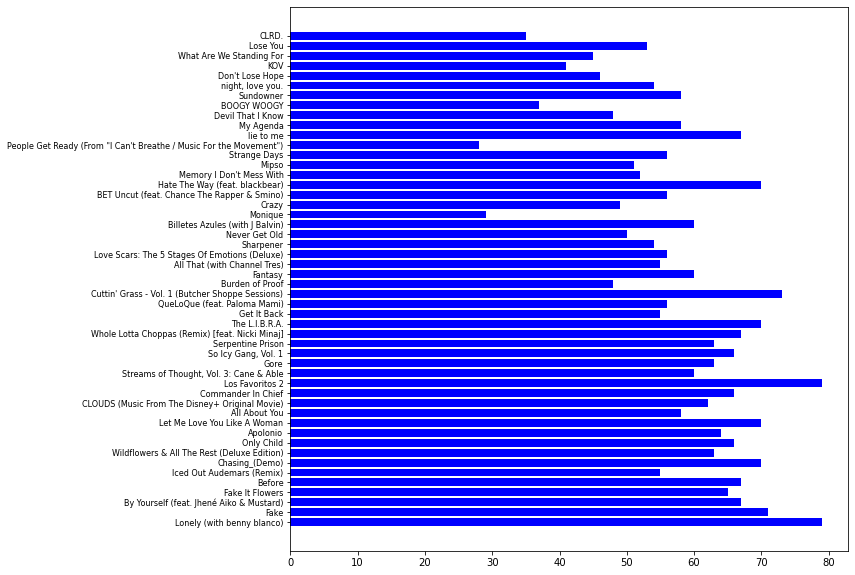

<Figure size 432x288 with 0 Axes>

In [86]:
plt.figure(figsize=(10,10))

x_axis = np.arange(len(cleaned_df["Album Name"]))
tick_locations = [value for value in x_axis]

albums = cleaned_df["Album Name"]
pop = cleaned_df["Album Popularity"]

plt.savefig("testtest.png")

plt.barh(x_axis, pop, color="b")
plt.yticks(tick_locations, labels = albums, fontsize = 8)

plt.show()

plt.savefig("testtest.png")

In [50]:
avail_only = cleaned_df.drop(
    columns=["Album Popularity", "Album Name", "Album ID", "Album Genre"])
avail_only.head()

,AF,AL,DZ,AS,AD,AO,AI,AQ,AG,AR,...,UZ,VU,VE,VN,VI,WF,EH,YE,ZM,ZW
0,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [51]:
country_list = list(avail_only.columns.values)
country_list

['AF',
 'AL',
 'DZ',
 'AS',
 'AD',
 'AO',
 'AI',
 'AQ',
 'AG',
 'AR',
 'AM',
 'AW',
 'AU',
 'AT',
 'AZ',
 'BS',
 'BH',
 'BD',
 'BB',
 'BY',
 'BE',
 'BZ',
 'BJ',
 'BM',
 'BT',
 'BO',
 'BA',
 'BW',
 'BV',
 'BR',
 'IO',
 'VG',
 'BN',
 'BG',
 'BF',
 'MM',
 'BI',
 'CV',
 'KH',
 'CM',
 'CA',
 'KY',
 'CF',
 'TD',
 'CL',
 'CN',
 'CX',
 'CC',
 'CO',
 'KM',
 'CD',
 'CG',
 'CK',
 'CR',
 'CI',
 'HR',
 'CU',
 'CW',
 'CY',
 'CZ',
 'DK',
 'DJ',
 'DM',
 'DO',
 'EC',
 'EG',
 'SV',
 'GQ',
 'ER',
 'EE',
 'SZ',
 'ET',
 'FK',
 'FO',
 'FJ',
 'FI',
 'FR',
 'FX',
 'GF',
 'PF',
 'TF',
 'GA',
 'GM',
 'PS',
 'GE',
 'DE',
 'GH',
 'GI',
 'GR',
 'GL',
 'GD',
 'GP',
 'GU',
 'GT',
 'GG',
 'GN',
 'GW',
 'GY',
 'HT',
 'HM',
 'VA',
 'HN',
 'HK',
 'HU',
 'IS',
 'IN',
 'ID',
 'IR',
 'IQ',
 'IE',
 'IM',
 'IL',
 'IT',
 'JM',
 'JP',
 'JE',
 'JO',
 'KZ',
 'KE',
 'KI',
 'KP',
 'KR',
 'XK',
 'KW',
 'KG',
 'LA',
 'LV',
 'LB',
 'LS',
 'LR',
 'LY',
 'LI',
 'LT',
 'LU',
 'MO',
 'MG',
 'MW',
 'MY',
 'MV',
 'ML',
 'MT',
 'MH',
 'MQ',

<AxesSubplot:>

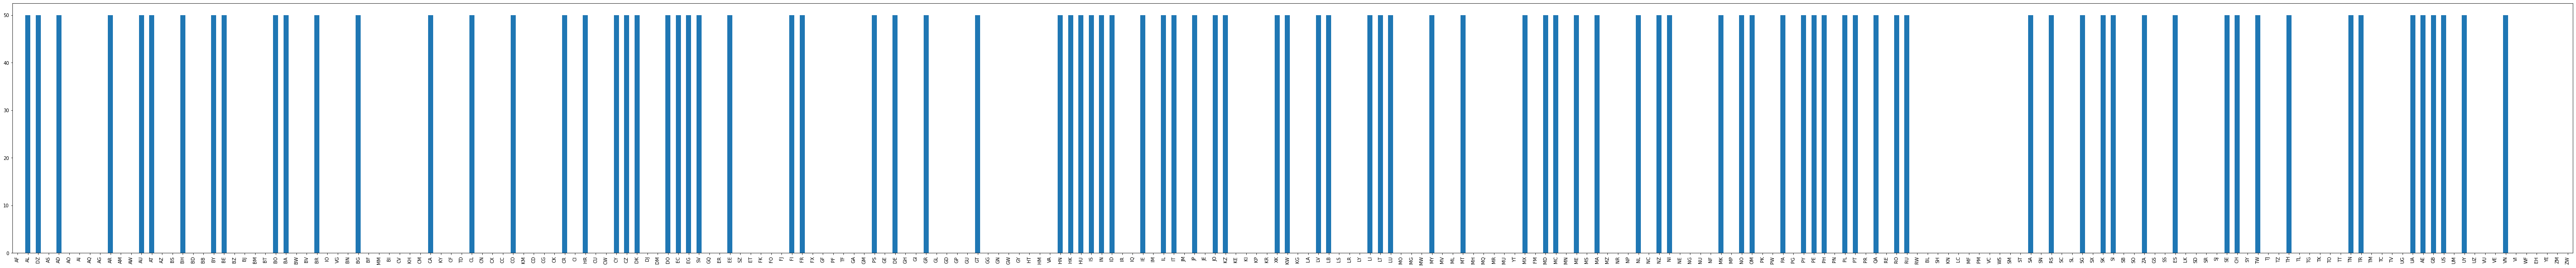

In [52]:
tick_locations = [value for value in np.arange(len(country_list))]
plt.figure(figsize=(100,10)) 

avail_only.sum().plot.bar()

In [90]:
avail_locate = avail_only.loc[[0]]

avail_locate = avail_locate.loc[:, avail_locate.gt(0).all()]

avail_locate

,AL,DZ,AD,AR,AU,AT,BH,BY,BE,BO,...,TW,TH,TN,TR,UA,AE,GB,US,UY,VN
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
